In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from capstone_methods import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

In [3]:
file = r"C:\Users\cstens4\Desktop\Code\Capstone\Excel Files\selectedX.xlsx"
df = pd.read_excel(file, 'Sheet1')

## Models

In [4]:
model_DT = DecisionTreeClassifier()
model_RF= RandomForestClassifier()
model_LG = LogisticRegression()

### Splitting Data

In [5]:
from sklearn.model_selection import train_test_split

y = df['attempt_suicide']
X = df.drop(['attempt_suicide'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.25)

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]

print(vif_data)


           feature        VIF
0           gender   4.220004
1        sexuality   9.010055
2              age  22.167429
3           income   2.440796
4             race   5.983338
5       bodyweight   4.130583
6          friends   2.313843
7      social_fear   3.464459
8        depressed   3.394055
9       employment   1.903793
10       education   4.441129
11  total_improves   2.750064
12    open_to_help   2.205913


### Scoring Models

#### Decision Tree Classifier

In [7]:
get_scores(model_DT, X, y)

[0.62352941 0.67605634 0.6625    ]
Average Precision Score: 0.6540285832642917

[0.75362319 0.67647059 0.76811594]
Average Recall Score: 0.7327365728900256

[0.72258065 0.71942446 0.72222222]
Average F1 Score: 0.7214091092717224


#### Random Forest Classifier

In [8]:
get_scores(model_RF, X, y)

[0.77941176 0.70422535 0.78461538]
Average Precision Score: 0.7560841671446475

[0.76811594 0.73529412 0.76811594]
Average Recall Score: 0.7571753339016766

[0.74626866 0.72340426 0.77372263]
Average F1 Score: 0.7477985132575977


#### Logistic Regression

In [9]:
get_scores(model_LG, X, y)

[0.56666667 0.65671642 0.6984127 ]
Average Precision Score: 0.6405985943299376

[0.49275362 0.64705882 0.63768116]
Average Recall Score: 0.5924978687127025

[0.52713178 0.65185185 0.66666667]
Average F1 Score: 0.6152167671547516


## Comparing Models 

### Model Training

In [10]:
model_A = DecisionTreeClassifier()
model_B = RandomForestClassifier()
model_C = LogisticRegression()

In [11]:
model_A.fit(X_train, y_train)
model_B.fit(X_train, y_train)
model_C.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred_A = model_A.predict(X_test)
y_pred_B = model_B.predict(X_test)
y_pred_C = model_C.predict(X_test)

### Recall Scores

In [13]:
pairTest(model_A, model_B, X, y, 'recall')

P-value: 0.284, t-Statistic: 1.200
Algorithms probably have the same performance


In [14]:
pairTest(model_A, model_C, X, y, 'recall')

P-value: 0.103, t-Statistic: 1.992
Algorithms probably have the same performance


In [15]:
pairTest(model_B, model_C, X, y, 'recall')

P-value: 0.005, t-Statistic: 4.676
Difference between mean performance is real


### Decision Tree Classifier

In [16]:
print(classification_report(y_test, y_pred_A))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       116
           1       0.66      0.76      0.70        41

    accuracy                           0.83       157
   macro avg       0.78      0.81      0.79       157
weighted avg       0.84      0.83      0.84       157



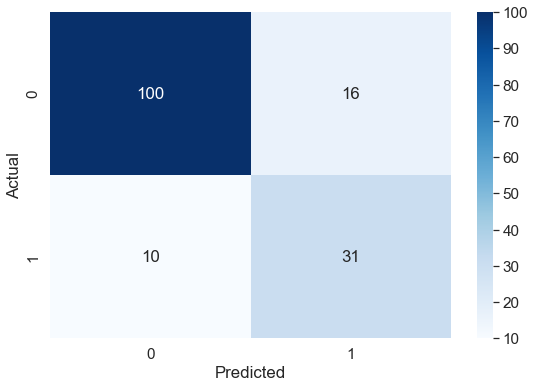

In [17]:
plot_confusion(y_test, y_pred_A)

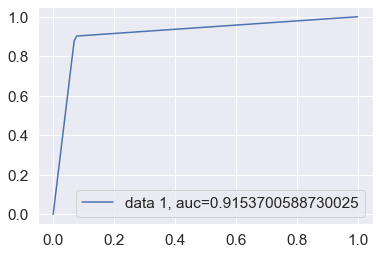

In [18]:
auc_chart(X_test, y_test, model_A)

In [19]:
phi_stat(102,14,11,30)

0.5975979885254821


### Random Forest Classifier

In [20]:
print(classification_report(y_test, y_pred_B))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       116
           1       0.82      0.76      0.78        41

    accuracy                           0.89       157
   macro avg       0.87      0.85      0.86       157
weighted avg       0.89      0.89      0.89       157



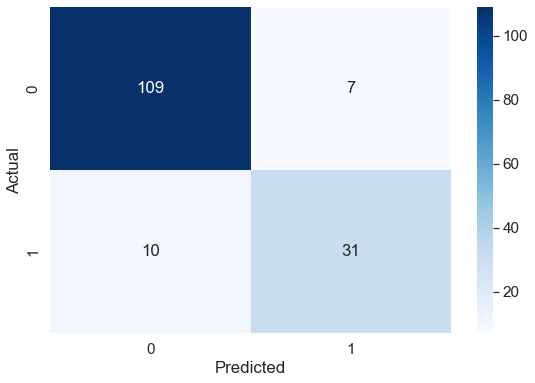

In [21]:
plot_confusion(y_test, y_pred_B)

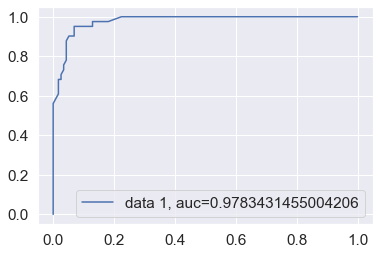

In [22]:
auc_chart(X_test, y_test, model_B)

In [23]:
phi_stat(108,8,9,32)

0.7172763389691427


### Logistic Regression

In [24]:
print(classification_report(y_test, y_pred_C))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       116
           1       0.61      0.66      0.64        41

    accuracy                           0.80       157
   macro avg       0.74      0.76      0.75       157
weighted avg       0.81      0.80      0.80       157



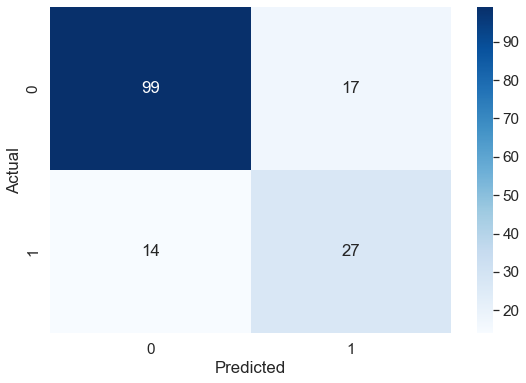

In [25]:
plot_confusion(y_test, y_pred_C)

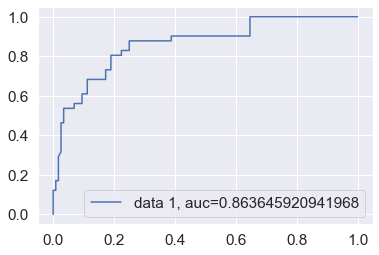

In [26]:
auc_chart(X_test, y_test, model_C)

In [27]:
phi_stat(99,17,14,27)

0.500740227825034


In [203]:
estimator = model_B.estimators_[0]

from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file='r.dot', 
                feature_names = X_train.columns,
                class_names = ['No', 'Yes'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'r.dot', '-o', 'r.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'r.png')

## Other Information

In [34]:
cols = df.columns

Text(0.5, 0, 'Feature Importances')

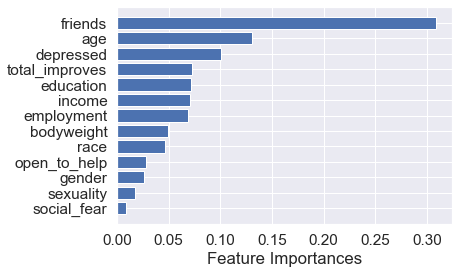

In [35]:
sort = r.feature_importances_.argsort()

plt.barh(cols[sort], r.feature_importances_[sort])
plt.xlabel("Feature Importances")

In [36]:
feat_df = pd.DataFrame(model_B.feature_importances_[sort], cols[sort])
feat_df = feat_df.reset_index()
feat_df.columns = ['Variable', 'Score']
feat_df.sort_values(by='Score', ascending=False)

Variable     Score
12         friends  0.218655
11             age  0.122438
10       depressed  0.092249
9   total_improves  0.088406
6       employment  0.086555
7           income  0.079884
8        education  0.073252
4             race  0.064818
5       bodyweight  0.051700
1        sexuality  0.034731
0      social_fear  0.030253
2           gender  0.029146
3     open_to_help  0.027914

In [28]:
pred_prob1 = model_A.predict_proba(X_test)
pred_prob2 = model_B.predict_proba(X_test)
pred_prob3 = model_C.predict_proba(X_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score1, auc_score2, auc_score3)

0.9153700588730025 0.9783431455004206 0.863645920941968


In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Logistic Regression')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();